In [1]:
# from PIL import Image
# import os

# # Define the path to the directory containing the original images
# source_directory = 'C:/Users/yuvra/Desktop/Project Bit/Training/pituitary'
# # Define the path to the directory where the augmented images will be saved
# output_directory = 'C:/Users/yuvra/Desktop/Project Bit/pituitary_train'

# # Create the output directory if it does not exist
# if not os.path.exists(output_directory):
#     os.makedirs(output_directory)

# # Define the rotation angles
# rotation_angles = [45, 90, 180, 360]

# # Loop through each file in the source directory
# for filename in os.listdir(source_directory):
#     if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for common image file extensions
#         # Construct the full file path
#         file_path = os.path.join(source_directory, filename)
#         # Open the image
#         image = Image.open(file_path)
        
#         # Rotate the image by each angle and save the new image
#         for angle in rotation_angles:
#             # Rotate the image
#             rotated_image = image.rotate(angle)
#             # Construct the new filename
#             new_filename = f'{os.path.splitext(filename)[0]}_rotated_{angle}{os.path.splitext(filename)[1]}'
#             # Construct the full path to the new file
#             new_file_path = os.path.join(output_directory, new_filename)
#             # Save the rotated image
#             rotated_image.save(new_file_path)

# print("Image augmentation completed.")


In [1]:
import numpy as np  
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt 
from PIL import Image 
import keras
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam
import tensorflow as tf 
import os
import pydot as pydot

In [5]:
# Training folder path
Train_path='C:/Users/yuvra/Desktop/Project Bit/Train_aug' 

# Testing folder path
Test_path='C:/Users/yuvra/Desktop/Project Bit/Testing_aug' 

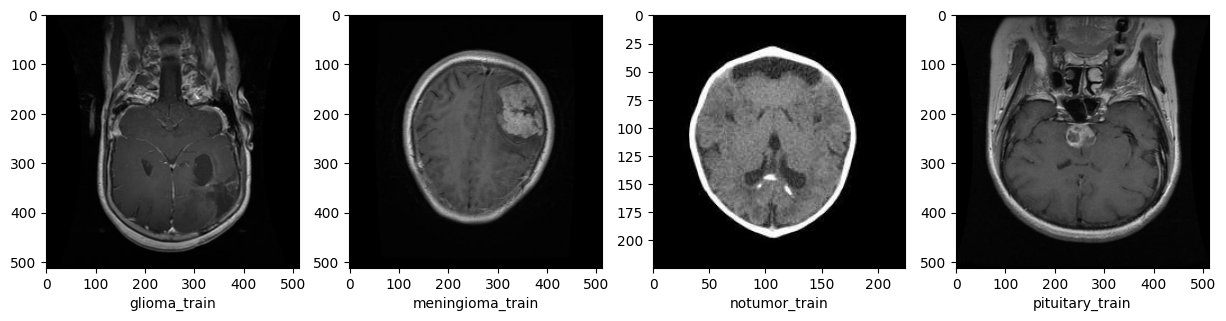

In [6]:
# Show all images from each classes
index=1
plt.figure(figsize=(15,5))
for dir in os.listdir(Train_path):
  label = dir
  for img in os.listdir(os.path.join(Train_path, dir)):
    plt.subplot(1,4, index)
    plt.imshow(cv2.imread(os.path.join(Train_path, dir, img)))
    plt.xlabel(label)
    index = index+ 1
    break

plt.show()

In [9]:
# base_dir = 'C:/Users/yuvra/Desktop/Project Bit/Train_aug'
  
# img_size = 160
# batch = 32

In [10]:
 
# # Create a data augmentor 
# train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,  
#                                    zoom_range=0.2, horizontal_flip=True, 
#                                    validation_split=0.2) 
  
# test_datagen = ImageDataGenerator(rescale=1. / 255, 
#                                   validation_split=0.2) 
  
# # Create datasets 
# # train_datagen = train_datagen.flow_from_directory(base_dir, 
#                                                   target_size=( 
#                                                       img_size, img_size), 
#                                                   subset='training', 
#                                                   batch_size=batch) 
# test_datagen = test_datagen.flow_from_directory(base_dir, 
#                                                 target_size=( 
#                                                     img_size, img_size), 
#                                                 subset='validation', 
#                                                 batch_size=batch) 

Found 5963 images belonging to 4 classes.
Found 1489 images belonging to 4 classes.


In [7]:
model = Sequential() 
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', 
                 activation='relu', input_shape=(128, 128, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
  
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
  
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dense(4, activation="softmax")) 

C:\Users\yuvra\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,215,364 (8.45 MB)

 Trainable params: 2,215,364 (8.45 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Use Image Data Generator

datagen = ImageDataGenerator(rotation_range=10, height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)
train_data = datagen.flow_from_directory('C:/Users/yuvra/Desktop/Project Bit/Train_aug', target_size=(128,128), batch_size=64, class_mode='categorical', subset='training')

valid_data = datagen.flow_from_directory('C:/Users/yuvra/Desktop/Project Bit/Train_aug', target_size=(128,128), batch_size=64, class_mode='categorical', subset='validation')

test_datagen = ImageDataGenerator()

test_data = datagen.flow_from_directory('C:/Users/yuvra/Desktop/Project Bit/Testing_aug', target_size=(128,128), class_mode='categorical')

Found 5963 images belonging to 4 classes.
Found 1489 images belonging to 4 classes.
Found 3540 images belonging to 4 classes.


In [10]:
train_data.class_indices

{'glioma_train': 0,
 'meningioma_train': 1,
 'notumor_train': 2,
 'pituitary_train': 3}

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(train_data, epochs=10, validation_data=valid_data, verbose=1)

Epoch 1/10


C:\Users\yuvra\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 96s 980ms/step - accuracy: 0.3925 - loss: 8.8479 - val_accuracy: 0.5467 - val_loss: 1.0941
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 77s 799ms/step - accuracy: 0.6603 - loss: 0.8458 - val_accuracy: 0.5917 - val_loss: 0.9885
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 77s 800ms/step - accuracy: 0.7490 - loss: 0.6619 - val_accuracy: 0.6582 - val_loss: 0.9515
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 77s 800ms/step - accuracy: 0.7876 - loss: 0.5794 - val_accuracy: 0.6837 - val_loss: 0.9949
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8047 - loss: 0.5038 - val_accuracy: 0.6938 - val_loss: 0.9519
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.8055 - loss: 0.4880 - val_accuracy: 0.7461 - val_loss: 0.7819
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.8430 - loss: 0.4132 - val_accuracy: 0.7529 - val_loss: 0.9970
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.8621 - loss: 0.3608 - val_accuracy: 0.7280 - val_l

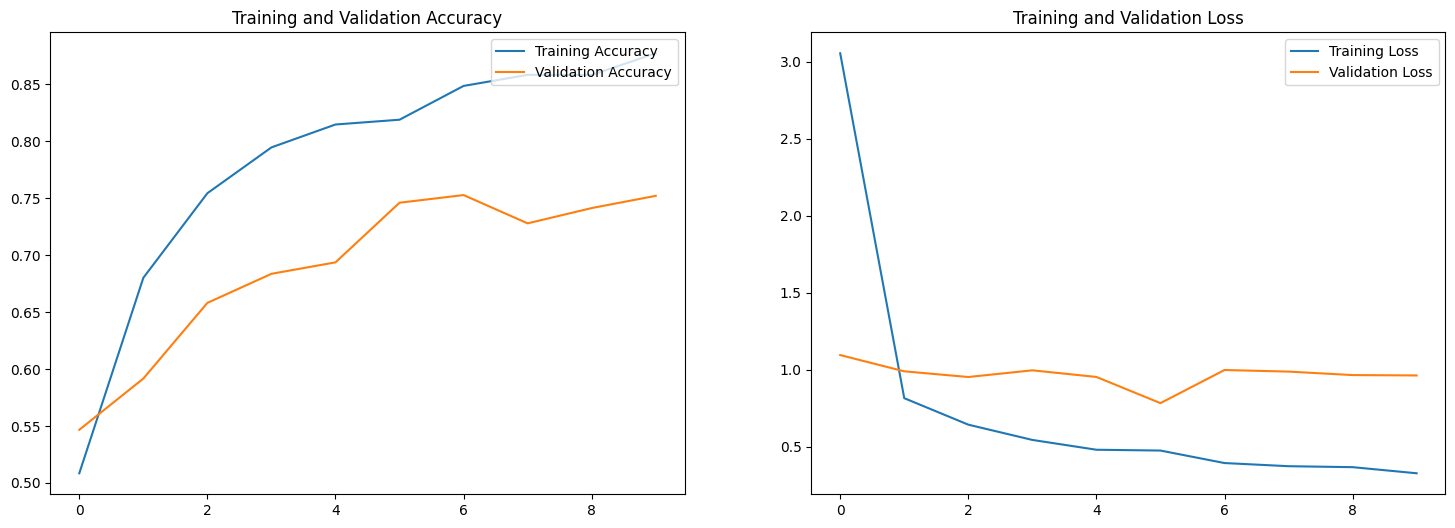

In [14]:
# save model
# model.save('brain.model')

# Plot accuracy and  loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
from tensorflow.keras.models import load_model
model.save('adiyal2.h5')

In [18]:
# test_img=image.load_img("C:/Users/yuvra/Desktop/Project Bit/Train_aug/notumor_train/Tr-no_0019_rotated_90.jpg",target_size=(224,224))

In [16]:
# load model
from tensorflow.keras.models import load_model 
savedModel=load_model('adiyal2.h5')